In [10]:
import pandas as pd
import numpy as np 

In [11]:
wine_red = pd.read_csv('/home/dm/Desktop/pryectos revisado/wine_quality/datamining/winequality-red.csv', delimiter=';')

wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
#Create a funtion to score wine quality whit words, and then use it to create a new column named score, score is from brilliant to horrible 

wine_red['score'] = np.where(wine_red['quality'] > 6, 'brilliant', np.where(wine_red['quality'] > 4, 'good', np.where(wine_red['quality'] > 3, 'common', 'bad')))


In [13]:
#Drop the quality column
wine_red = wine_red.drop(columns=['quality'])

In [14]:
wine_red.groupby('score').size()

score
bad            10
brilliant     217
common         53
good         1319
dtype: int64

In [15]:
from pycaret.classification import *

data_wine_red = setup(data = wine_red, target = 'score', session_id = 123)

,Description,Value
0,session_id,123
1,Target,score
2,Target Type,Multiclass
3,Label Encoded,"bad: 0, brilliant: 1, common: 2, good: 3"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8651,0.6841,0.3801,0.8267,0.8362,0.4223,0.4650,0.0420
catboost,CatBoost Classifier,0.8651,0.6576,0.3952,0.8287,0.8411,0.4539,0.4803,4.9740
rf,Random Forest Classifier,0.8579,0.6648,0.3819,0.8129,0.8302,0.4076,0.4337,0.0540
lightgbm,Light Gradient Boosting Machine,0.8517,0.6454,0.3853,0.8116,0.8281,0.4082,0.4250,0.0390
xgboost,Extreme Gradient Boosting,0.8508,0.6592,0.3825,0.8124,0.8276,0.4047,0.4237,0.0590
gbc,Gradient Boosting Classifier,0.8463,0.6535,0.3655,0.8157,0.8266,0.3987,0.4149,0.1010
lr,Logistic Regression,0.8365,0.6194,0.3323,0.7859,0.7971,0.2533,0.3005,0.3130
ridge,Ridge Classifier,0.8266,0.0000,0.2884,0.7613,0.7645,0.0958,0.1619,0.0020
dummy,Dummy Classifier,0.8222,0.4000,0.2667,0.6760,0.7419,0.0000,0.0000,0.0030
lda,Linear Discriminant Analysis,0.8186,0.6366,0.3641,0.7819,0.7962,0.2898,0.3034,0.0030


In [17]:
gbc_model = create_model("gbc")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8661,0.8363,0.3539,0.8289,0.8382,0.4254,0.4678
1,0.8571,0.7942,0.3512,0.8238,0.8345,0.4199,0.4435
2,0.8750,0.0000,0.3825,0.8480,0.8568,0.5051,0.5268
3,0.8036,0.0000,0.2962,0.7709,0.7797,0.2092,0.2216
4,0.7946,0.7710,0.3714,0.7706,0.7813,0.2485,0.2518
5,0.8571,0.8599,0.3725,0.8276,0.8393,0.4508,0.4641
6,0.8661,0.8352,0.4210,0.8427,0.8484,0.4727,0.4921
7,0.8214,0.8408,0.3197,0.7820,0.7964,0.2809,0.2972
8,0.8750,0.8181,0.4197,0.8426,0.8585,0.5498,0.5550


In [18]:
evaluate_model(gbc_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

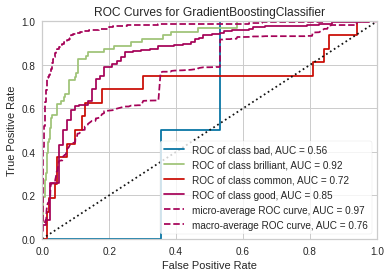

In [19]:
plot_model(gbc_model)

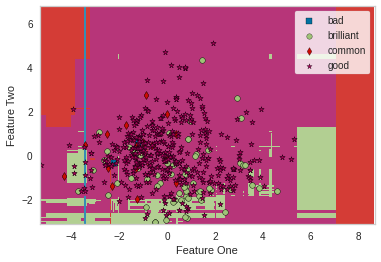

In [20]:
plot_model(gbc_model, plot = 'boundary')

In [21]:
predict_model(gbc_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8729,0.8568,0.3795,0.8435,0.8555,0.4830,0.4982


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,score,Label,Score
0,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,12.2,good,brilliant,0.7828
1,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,9.4,good,good,0.9845
2,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,good,good,0.9825
3,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,12.3,good,brilliant,0.5790
4,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,9.3,good,good,0.9768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,7.3,0.48,0.32,2.1,0.062,31.0,54.0,0.99728,3.30,0.65,10.0,brilliant,good,0.7634
476,12.3,0.50,0.49,2.2,0.089,5.0,14.0,1.00020,3.19,0.44,9.6,good,good,0.9528
477,7.2,0.38,0.30,1.8,0.073,31.0,70.0,0.99685,3.42,0.59,9.5,good,good,0.9892
478,9.8,0.30,0.39,1.7,0.062,3.0,9.0,0.99480,3.14,0.57,11.5,brilliant,brilliant,0.7054


In [22]:
save_model(gbc_model, model_name = 'gbc_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='score',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                             learning_rate=0.1, loss='deviance',
                                             max_depth=3, max_features=None,
                                             max_leaf_nodes=None,
                                             min_i

In [23]:
wine_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000
